In [1]:
import pandas as pd

In [14]:
titanic_data=pd.read_csv(r"C:\Users\Admin\Desktop\Python Programs\titanic\train.csv")

In [17]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [40]:
X = titanic_data.drop(['PassengerId','Survived','Name','Ticket','Cabin'],axis=1)

In [41]:
X = pd.get_dummies(X)

In [42]:
X = X.fillna({'Age':X.Age.median()})

In [59]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,28.0,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [43]:
Y = titanic_data.Survived

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
%matplotlib inline

from graphviz import Source
from IPython.display import SVG, display, HTML
style = "<style>svg{width: 70% !important; height: 60% !important;} </style>" 

In [75]:
clf=tree.DecisionTreeClassifier(criterion='entropy',max_depth=2)

In [76]:
clf.fit(X,Y)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

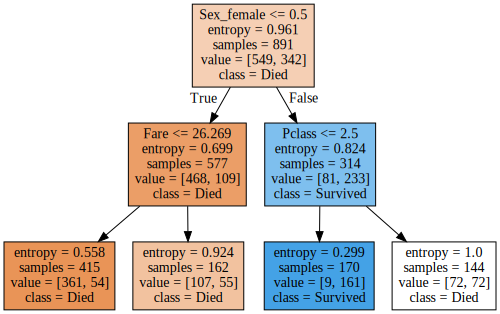

In [77]:
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X),
class_names=['Died', 'Survived'], filled=True))
display(SVG(graph.pipe(format='svg')))

In [78]:
# Making train and test samples
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

In [79]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
6,1,54.0,0,0,51.8625,0,1,0,0,1
718,3,28.0,0,0,15.5000,0,1,0,1,0
685,2,25.0,1,2,41.5792,0,1,1,0,0
73,3,26.0,1,0,14.4542,0,1,1,0,0
882,3,22.0,0,0,10.5167,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
106,3,21.0,0,0,7.6500,1,0,0,0,1
270,1,28.0,0,0,31.0000,0,1,0,0,1
860,3,41.0,2,0,14.1083,0,1,0,0,1
435,1,14.0,1,2,120.0000,1,0,0,0,1


In [80]:
clf.score(X,Y)

0.7867564534231201

In [81]:
clf.score(X_train,Y_train)

0.7936241610738255

In [82]:
clf.score(X_test,Y_test)

0.7728813559322034

In [85]:
#Using cross-validation
from sklearn.model_selection  import cross_val_score

In [88]:
#средняя точность на кроссвалидации
cross_val_score(clf,X_train,Y_train,cv=5).mean()

0.7701960784313726

In [ ]:
#Построили дерево решений c глуюиной 2 и посчитали его score (эффективность)
#Также обучили модель используя кросс-валидацию.